In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
traindata = pd.read_csv(r'C:\Users\Chinmay\Desktop\AAI\FinalProject- 646\FinalProject_646-main\FinalProject_646-main\datasets\archive\sign_mnist_train\sign_mnist_train.csv')
testdata = pd.read_csv(r'C:\Users\Chinmay\Desktop\AAI\FinalProject- 646\FinalProject_646-main\FinalProject_646-main\datasets\archive\sign_mnist_test\sign_mnist_test.csv')

In [3]:
traindata.shape


(27455, 785)

In [4]:
testdata.shape

(7172, 785)

<AxesSubplot:ylabel='count'>

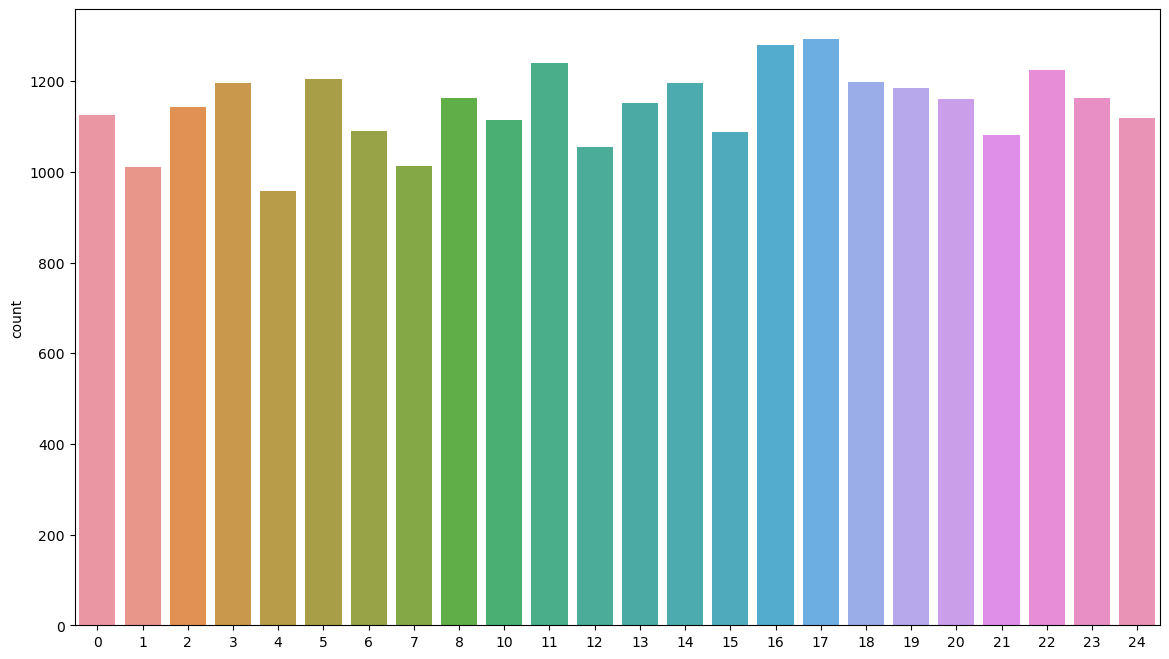

In [5]:
labels = traindata['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

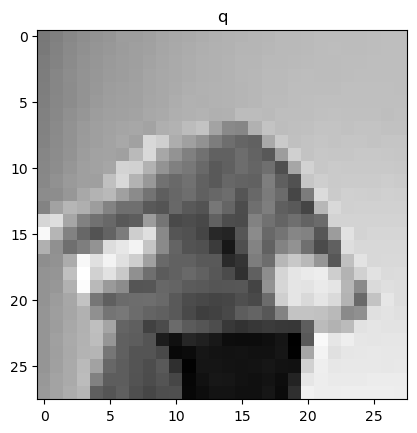

In [6]:
import random as rd

alphabet=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
n = rd.randrange(traindata.shape[0])
ar = np.array(traindata.loc[n][1:]).reshape((28,28))
plt.imshow(ar, cmap='gray')
plt.title(alphabet[traindata.loc[n][0]])
plt.show()

In [7]:
y = traindata["label"]
X = traindata.drop(['label'], axis=1)

X = np.array(X)/255
y = np.array(y)

Y = np.zeros((len(alphabet),traindata.shape[0]))
for i in range(len(y)):
  Y[y[i],i] = 1
X = X.reshape((-1, 28,28,1))
Y = Y.reshape((26,-1))
#X=traindata.iloc[:,1:]
#y=traindata.iloc[:,:1]

In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Input

model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1),padding='same'))
model.add(tf.keras.layers.Convolution2D(32, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=None,padding='same'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.Convolution2D(64, (3, 3), activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=None,padding='same'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(556, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(26, activation='softmax'))

model.summary()

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [9]:
history = model.fit(X,y,batch_size=64,epochs=3, validation_split=0.2) #training


Epoch 1/3
344/344 [==============================] - 26s 73ms/step - loss: 1.2380 - accuracy: 0.6195 - val_loss: 0.0373 - val_accuracy: 0.9882
Epoch 2/3
344/344 [==============================] - 26s 75ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0064 - val_accuracy: 0.9991
Epoch 3/3
344/344 [==============================] - 26s 75ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0019 - val_accuracy: 1.0000


#  Testing the model using Testing Data

1/1 [==============================] - 0s 21ms/step


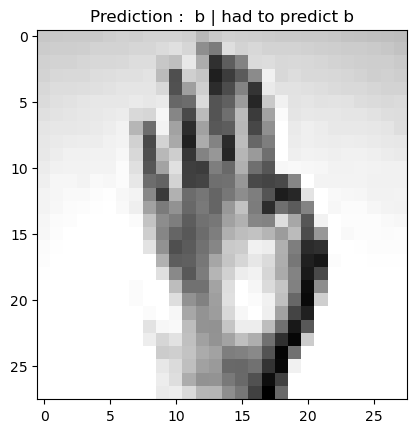

In [16]:
n = rd.randrange(testdata.shape[0])
y = testdata["label"]
X = testdata.drop(['label'], axis=1)

ar = np.array(testdata.loc[n][1:]).reshape((28,28))

X = np.array(X)/255
y = np.array(y)

Y = np.zeros((26,testdata.shape[0]))
for i in range(len(y)):
  Y[y[i],i] = 1
X = X.reshape((-1, 28,28,1))
Y = Y.reshape((26,-1))

plt.imshow(ar, cmap='gray')
plt.title(f"Prediction :  {alphabet[ np.argmax(model.predict(X[n].reshape(1,28,28,1)))]} | had to predict {alphabet[testdata.loc[n][0]]}")
plt.show()

As we can see, model is able to predict the image from the testing data set